In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import re

sn.set_theme(style="ticks")

import warnings
warnings.filterwarnings('ignore')

In [2]:
def count_words(content: str):
    return len(re.findall(r'\w+', content))

In [2]:
df = pd.read_csv("metrics_results/cot_validation_gpto.csv")

In [6]:
df.groupby("iter_mode")[["correct_response", "all_possible_actions"]].mean()

,correct_response,all_possible_actions
iter_mode,,
0.0,0.455729,1.0
1.0,0.566406,1.0


In [89]:
df_mixtral = pd.read_csv("metrics_results/cot_validation_mixtral.csv")
df_mixtral["n_possible_actions"] = df_mixtral["actions_possible"].apply(count_possible_acitons)
df_gpto = pd.read_csv("metrics_results/cot_validation_gpto.csv")
df_gpto["n_possible_actions"] = df_gpto["actions_possible"].apply(count_possible_acitons)
df_llama = pd.read_csv("metrics_results/cot_validation_llama.csv")
df_llama["n_possible_actions"] = df_llama["actions_possible"].apply(count_possible_acitons)

In [98]:
df_mixtral = pd.read_csv("metrics_results/cot_mixtral.csv")
df_mixtral["n_possible_actions"] = df_mixtral["actions_possible"].apply(count_possible_acitons)
df_gpto = pd.read_csv("metrics_results/cot_gpto.csv")
df_gpto["n_possible_actions"] = df_gpto["actions_possible"].apply(count_possible_acitons)
df_llama = pd.read_csv("metrics_results/cot_llama.csv")
df_llama["n_possible_actions"] = df_llama["actions_possible"].apply(count_possible_acitons)

In [99]:
df_mixtral ["Model"] = "Mixtral"
df_gpto ["Model"] = "GPT-4o"
df_llama ["Model"] = "LLAMA"

In [100]:
df = pd.concat([df_mixtral, df_gpto, df_llama])

In [81]:
df["n_words"] = df["content"].apply(count_words_weighted)
df["n_tokens"] = (df["n_words"] * (1000 / 750)).round()

In [28]:
df

,instance_id,ground_truth_plan,goal_achieved,content,actions_text,actions_possible,n_actions,ground_truth_n_actions,correct_response,n_run,...,all_possible_actions,iter_mode,n_iterations,distance_to_ground_truth,distance_to_init,repeated_states,Model,optimal_plan,n_words,n_tokens
0,1657,(unstack b a)\n(put-down b)\n(unstack a c)\n(s...,False,human: I am playing with a set of blocks where...,unstack the blue block from on top of the red ...,1.1.0.1.1.0.0.0.0.0.0.0.0.0.0.0,16,10,False,0,...,True,1.0,16.0,8,2,2,Mixtral,False,5386,7181.0
1,1819,(unstack d c)\n(put-down d)\n(unstack c a)\n(p...,False,human: I am playing with a set of blocks where...,unstack the orange block from on top of the re...,0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0,16,12,False,0,...,True,1.0,16.0,12,0,0,Mixtral,False,7338,9784.0
2,831,(unstack b d)\n(stack b a)\n,False,human: I am playing with a set of blocks where...,unstack the blue block from on top of the yell...,1.1.1.1.0.0.0.0.0.0.0.0.0.0.0.0,16,2,False,0,...,True,1.0,16.0,4,4,0,Mixtral,False,4525,6033.0
3,1280,(unstack d a)\n(stack d c)\n(unstack a b)\n(pu...,False,human: I am playing with a set of blocks where...,pick up the yellow block.no action.no action.n...,0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0,16,10,False,0,...,True,1.0,16.0,10,0,0,Mixtral,False,7122,9496.0
4,1451,(pick-up d)\n(stack d b)\n,False,human: I am playing with a set of blocks where...,pick up the yellow block.put down the yellow b...,1.1.0.1.1.1.1.0.0.1.1.1.1.0.1.1,16,2,False,0,...,True,1.0,16.0,2,0,10,Mixtral,False,3976,5301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,956,(unstack c d)\n(put-down c)\n(unstack d b)\n(p...,False,human: I am playing with a set of blocks where...,unstack the orange block from on top of the ye...,1.0.0.0.0.0.0.0.0.0,10,6,False,0,...,True,0.0,10.0,5,1,0,LLAMA,False,2904,3872.0
1532,876,(unstack a b)\n(put-down a)\n(unstack b d)\n(p...,False,human: I am playing with a set of blocks where...,unstack the red block from on top of the blue ...,1.1.0.0.0.1.1.0.0.1,10,12,False,0,...,True,0.0,10.0,11,1,3,LLAMA,False,3013,4017.0
1533,1093,(unstack b d)\n(put-down b)\n(unstack d c)\n(p...,False,human: I am playing with a set of blocks where...,unstack the yellow block from on top of the or...,0.1.1.0.0.0.0.0.0.0,10,8,False,0,...,True,0.0,10.0,6,2,0,LLAMA,False,2968,3957.0
1534,1830,(pick-up a)\n(stack a c)\n,False,human: I am playing with a set of blocks where...,unstack the orange block from on top of the bl...,1.1.1.1.0.0.0.1.0.0,10,2,False,0,...,True,0.0,10.0,1,1,2,LLAMA,False,2843,3791.0


In [7]:
df.groupby(["Model", "iter_mode"])[["goal_achieved", "all_possible_actions", "correct_response"]].mean()

goal_achieved  all_possible_actions  correct_response
Model   iter_mode                                                       
GPT-4o  0.0             0.455729                   1.0          0.455729
        1.0             0.566406                   1.0          0.566406
LLAMA   0.0             0.009115                   1.0          0.009115
        1.0             0.010417                   1.0          0.010417
Mixtral 0.0             0.023438                   1.0          0.023438
        1.0             0.024740                   1.0          0.024740

In [11]:
df.groupby(["Model", "ground_truth_n_actions"])[["goal_achieved", "all_possible_actions", "correct_response"]].mean()

goal_achieved  all_possible_actions  \
Model   ground_truth_n_actions                                        
GPT-4o  2                            0.867188                   1.0   
        4                            0.718750                   1.0   
        6                            0.660156                   1.0   
        8                            0.484375                   1.0   
        10                           0.230469                   1.0   
        12                           0.105469                   1.0   
LLAMA   2                            0.039062                   1.0   
        4                            0.015625                   1.0   
        6                            0.000000                   1.0   
        8                            0.000000                   1.0   
        10                           0.003906                   1.0   
        12                           0.000000                   1.0   
Mixtral 2                            0.097656                   1.0   
        4                            0.039062                   1.0   
        6                            0.000000                   1.0   
        8                            0.007812                   1.0   
        10                           0.000000                   1.0   
        12                           0.000000                   1.0   

                                correct_response  
Model   ground_truth_n_actions                    
GPT-4o  2                               0.867188  
        4                               0.718750  
        6                               0.660156  
        8                               0.484375  
        10                              0.230469  
        12                              0.105469  
LLAMA   2                               0.039062  
        4                               0.015625  
        6                               0.000000  
        8                               0.000000  
        10                              0.003906  
        12                              0.000000  
Mixtral 2                               0.097656  
        4                               0.039062  
        6                               0.000000  
        8                               0.007812  
        10                              0.000000  
        12                              0.000000

In [101]:
df["n_actions"] = df["actions_possible"].apply(lambda x: len(x.split(".")))
df["n_actions_rel"] = df["n_actions"] / df["ground_truth_n_actions"]

In [102]:
df["optimal_plan"] = (df["n_actions"] == df["ground_truth_n_actions"])

In [103]:
df.groupby(["Model", "iter_mode"])[["goal_achieved", "all_possible_actions", "correct_response", "optimal_plan", "n_actions_rel"]].mean()

goal_achieved  all_possible_actions  correct_response  \
Model   iter_mode                                                          
GPT-4o  0.0             0.585938              0.578125          0.533854   
        1.0             0.585938              0.578125          0.533854   
LLAMA   0.0             0.141927              0.174479          0.079427   
        1.0             0.141927              0.174479          0.079427   
Mixtral 0.0             0.102865              0.062500          0.041667   
        1.0             0.102865              0.062500          0.041667   

                   optimal_plan  n_actions_rel  
Model   iter_mode                               
GPT-4o  0.0            0.509115       1.170291  
        1.0            0.509115       1.170291  
LLAMA   0.0            0.115885       1.374761  
        1.0            0.115885       1.374761  
Mixtral 0.0            0.166667       1.293132  
        1.0            0.166667       1.293132

In [21]:
df_correct = df[df["correct_response"] == True]

In [23]:
df_correct.groupby(["Model"])[["goal_achieved", "all_possible_actions", "correct_response", "optimal_plan"]].mean()

,goal_achieved,all_possible_actions,correct_response,optimal_plan
Model,,,,
GPT-4o,1.0,1.0,1.0,0.814634
LLAMA,1.0,1.0,1.0,0.327869
Mixtral,1.0,1.0,1.0,0.531250


In [3]:
def count_possible_acitons(possible_actions: str):
    possible_actions = str(possible_actions)
    actions = possible_actions.split('.')
    n_possible_actions = 0
    for action in actions:
        if action == "1":
            n_possible_actions += 1
    return n_possible_actions

In [4]:
gpt_results = pd.read_csv('metrics_results/gpto_paper.csv')
del gpt_results['Unnamed: 0']

mixtral_results = pd.read_csv("metrics_results/mixtral_paper.csv")
del mixtral_results['Unnamed: 0']

llama_results = pd.read_csv("metrics_results/llama_paper.csv")

In [5]:
mixtral_results["Model"] = "Mixtral"
gpt_results["Model"] = "GPT-4o"
llama_results["Model"] = "Llama"

In [6]:
gpt_results["actions_text"] = gpt_results["actions_text"].fillna("no_action")
gpt_results["actions_possible"] = gpt_results["actions_possible"].fillna("0")
gpt_results["all_possible_actions"] = gpt_results["all_possible_actions"].fillna(True)
gpt_results["n_possible_actions"] = gpt_results["actions_possible"].apply(count_possible_acitons)

mixtral_results["actions_text"] = mixtral_results["actions_text"].fillna("no_action")
mixtral_results["actions_possible"] = mixtral_results["actions_possible"].fillna("0")
mixtral_results["all_possible_actions"] = mixtral_results["all_possible_actions"].fillna(True)
mixtral_results["n_possible_actions"] = mixtral_results["actions_possible"].apply(count_possible_acitons)

llama_results["actions_text"] = llama_results["actions_text"].fillna("no_action")
llama_results["actions_possible"] = llama_results["actions_possible"].fillna("0")
llama_results["all_possible_actions"] = llama_results["all_possible_actions"].fillna(True)
llama_results["n_possible_actions"] = llama_results["actions_possible"].apply(count_possible_acitons)

In [7]:
def count_words_weighted(content):
    human_messages = content.split("human:")[1:]
    messages = [h_message.split("ai") for h_message in human_messages]
    weights = list(range(len(messages), 0, -1))

    n_words = 0
    for i, message in enumerate(messages):
        h_message = message[0]
        ai_message = message[1]
        n_words += count_words(h_message) * weights[i]
        n_words += count_words(ai_message) * weights[i]
    return n_words

In [8]:
experiment_df = pd.concat([gpt_results, mixtral_results, llama_results])
experiment_df["n_actions"] = experiment_df["actions_possible"].apply(lambda x: len(x.split(".")))
experiment_df["n_iterations_iterative"] = experiment_df["n_actions"]
experiment_df["n_token"] = (experiment_df["content"].apply(count_words_weighted) * (1000 / 750))

In [9]:
content = experiment_df.iloc[5000]["content"]

In [73]:
experiment_df.groupby(["Model", "method", "iter_mode"])[["n_token"]].mean()

n_token
Model   method iter_mode              
GPT-4o  0      0            545.095486
               1            545.095486
        1      0           2798.072917
               1           4792.475694
        2      0           5162.208333
               1          10452.843750
        3      0           5773.772569
               1          10925.142361
        4      0           7702.253472
               1          16690.484375
Llama   0      0            554.520833
               1            554.520833
        1      0           2997.012153
               1           5148.913194
        2      0           4352.142361
               1           4366.604167
        3      0           6260.086806
               1          12544.710069
        4      0           8560.180556
               1          20978.208333
Mixtral 0      0            557.750000
               1            557.750000
        1      0           3123.631944
               1           5397.335069
        2      0           3749.791667
               1           3969.138889
        3      0           6226.015625
               1          13781.190972
        4      0           9070.050347
               1          22715.784722

In [82]:
df.groupby(["Model", "iter_mode"])[["n_tokens"]].mean()

n_tokens
Model   iter_mode              
GPT-4o  0.0        23878.720052
        1.0        46497.096354
LLAMA   0.0        24546.308594
        1.0        57275.468750
Mixtral 0.0        26156.197917
        1.0        60154.992188

In [74]:
df.groupby(["Model", "iter_mode"])[["n_tokens"]].mean()

n_tokens
Model   iter_mode             
GPT-4o  0.0        1515.893229
        1.0        1515.893229
LLAMA   0.0        1509.170573
        1.0        1509.170573
Mixtral 0.0        1503.380208
        1.0        1503.380208

In [85]:
gpt_results["n_actions"] = gpt_results["actions_possible"].apply(lambda x: len(x.split(".")))
gpt_results["n_actions_rel"] = gpt_results["n_actions"] / gpt_results["ground_truth_n_actions"]

In [86]:
gpt_results.groupby(["method", "iter_mode"])[["correct_response", "all_possible_actions", "n_actions_rel"]].agg("mean")

correct_response  all_possible_actions  n_actions_rel
method iter_mode                                                       
0      0                  0.071615              0.136719       1.078668
       1                  0.071615              0.136719       1.078668
1      0                  0.122396              0.140625       1.240017
       1                  0.128906              0.145833       1.479807
2      0                  0.016927              0.178385       1.413856
       1                  0.018229              0.177083       2.084310
3      0                  0.354167              1.000000       1.539334
       1                  0.444010              1.000000       2.150814
4      0                  0.476562              1.000000       1.170573
       1                  0.505208              1.000000       1.542188

In [87]:
mixtral_results["n_actions"] = mixtral_results["actions_possible"].apply(lambda x: len(x.split(".")))
mixtral_results["n_actions_rel"] = mixtral_results["n_actions"] / mixtral_results["ground_truth_n_actions"]
mixtral_results.groupby(["method", "iter_mode"])[["correct_response", "all_possible_actions", "n_actions_rel"]].agg("mean")

correct_response  all_possible_actions  n_actions_rel
method iter_mode                                                       
0      0                  0.007812              0.128906       1.053722
       1                  0.007812              0.128906       1.053722
1      0                  0.023438              0.115885       1.371832
       1                  0.023438              0.196615       1.085113
2      0                  0.110677              0.212240       1.006055
       1                  0.110677              0.212240       1.025933
3      0                  0.180990              1.000000       1.605252
       1                  0.218750              1.000000       2.372081
4      0                  0.173177              1.000000       1.590625
       1                  0.177083              1.000000       2.373524

In [88]:
llama_results["n_actions"] = llama_results["actions_possible"].apply(lambda x: len(x.split(".")))
llama_results["n_actions_rel"] = llama_results["n_actions"] / llama_results["ground_truth_n_actions"]
llama_results.groupby(["method", "iter_mode"])[["correct_response", "all_possible_actions", "n_actions_rel"]].agg("mean")

correct_response  all_possible_actions  n_actions_rel
method iter_mode                                                       
0      0                  0.028646              0.154948       1.110612
       1                  0.028646              0.154948       1.110612
1      0                  0.061198              0.256510       1.299935
       1                  0.063802              0.252604       1.416482
2      0                  0.009115              0.024740       1.209885
       1                  0.009115              0.024740       1.210688
3      0                  0.231771              1.000000       1.708550
       1                  0.334635              1.000000       2.392839
4      0                  0.256510              1.000000       1.400499
       1                  0.272135              1.000000       2.036198

In [18]:
gpt_results.groupby(["method", "iter_mode", "ground_truth_n_actions"])[["correct_response", "all_possible_actions"]].agg("mean")

correct_response  \
method iter_mode ground_truth_n_actions                     
0      0         2                               0.234375   
                 4                               0.101562   
                 6                               0.039062   
                 8                               0.031250   
                 10                              0.015625   
                 12                              0.007812   
       1         2                               0.234375   
                 4                               0.101562   
                 6                               0.039062   
                 8                               0.031250   
                 10                              0.015625   
                 12                              0.007812   
1      0         2                               0.304688   
                 4                               0.171875   
                 6                               0.070312   
                 8                               0.078125   
                 10                              0.070312   
                 12                              0.039062   
       1         2                               0.320312   
                 4                               0.171875   
                 6                               0.070312   
                 8                               0.078125   
                 10                              0.085938   
                 12                              0.046875   
2      0         2                               0.039062   
                 4                               0.015625   
                 6                               0.015625   
                 8                               0.023438   
                 10                              0.007812   
                 12                              0.000000   
       1         2                               0.039062   
                 4                               0.015625   
                 6                               0.015625   
                 8                               0.023438   
                 10                              0.007812   
                 12                              0.007812   
3      0         2                               0.625000   
                 4                               0.523438   
                 6                               0.382812   
                 8                               0.406250   
                 10                              0.187500   
                 12                              0.000000   
       1         2                               0.625000   
                 4                               0.562500   
                 6                               0.429688   
                 8                               0.437500   
                 10                              0.382812   
                 12                              0.226562   
4      0         2                               0.945312   
                 4                               0.882812   
                 6                               0.585938   
                 8                               0.375000   
                 10                              0.070312   
                 12                              0.000000   
       1         2                               0.953125   
                 4                               0.882812   
                 6                               0.593750   
                 8                               0.406250   
                 10                              0.148438   
                 12                              0.046875   

                                         all_possible_actions  
method iter_mode ground_truth_n_actions                        
0      0         2                                   0.414062  
                 4                                   0.148438  
  

In [16]:
gpt_results_succes = gpt_results[gpt_results["correct_response"] == True]
gpt_results_succes["optimal_plan"] = (gpt_results_succes["ground_truth_n_actions"] == gpt_results_succes["n_possible_actions"])

In [17]:
mixtral_results_success = mixtral_results[mixtral_results["correct_response"] == True]
mixtral_results_success["optimal_plan"] = (mixtral_results_success["ground_truth_n_actions"] == mixtral_results_success["n_possible_actions"])

In [18]:
llama_results_success = llama_results[llama_results["correct_response"] == True]
llama_results_success["optimal_plan"] = (llama_results_success["ground_truth_n_actions"] == llama_results_success["n_possible_actions"])

In [46]:
gpt_results_succes.groupby(["method", "iter_mode"])[["optimal_plan"]].agg("mean")

optimal_plan
method iter_mode              
0      0              1.000000
       1              1.000000
1      0              0.861702
       1              0.858586
2      0              0.769231
       1              0.785714
3      0              0.742647
       1              0.736070
4      0              0.797814
       1              0.757732

In [47]:
mixtral_results_success.groupby(["method", "iter_mode"])[["optimal_plan"]].agg("mean")

optimal_plan
method iter_mode              
0      0              0.833333
       1              0.833333
1      0              0.222222
       1              0.222222
2      0              0.623529
       1              0.623529
3      0              0.654676
       1              0.583333
4      0              0.503759
       1              0.492647

In [48]:
llama_results_success.groupby(["method", "iter_mode"])[["optimal_plan"]].agg("mean")

optimal_plan
method iter_mode              
0      0              0.636364
       1              0.636364
1      0              0.404255
       1              0.387755
2      0              0.857143
       1              0.857143
3      0              0.432584
       1              0.400778
4      0              0.776650
       1              0.732057

In [ ]:
gpt_results_succes.groupby(["method", "iter_mode", "ground_truth_n_actions"])[["n_iterations", "n_actions"]].agg("mean")

In [26]:
gpt_results_fail = gpt_results[gpt_results["correct_response"] == False]

In [27]:
gpt_results.columns

Index(['instance_id', 'ground_truth_plan', 'goal_achieved', 'content',
       'actions_text', 'actions_possible', 'n_actions',
       'ground_truth_n_actions', 'correct_response', 'n_run', 'method',
       'all_possible_actions', 'method_name', 'iter_mode', 'n_iterations',
       'distance_to_ground_truth', 'distance_to_init'],
      dtype='object')

In [ ]:
gpt_results_fail.groupby(["method", "iter_mode", "ground_truth_n_actions"])[["distance_to_ground_truth", "distance_to_init"]].agg("mean")

In [10]:
experiment_df_methods_2 = experiment_df[(experiment_df["method"].isin([3, 4]))]
experiment_df_methods_2.groupby(["Model", "method", "iter_mode", "ground_truth_n_actions"], as_index=False)["correct_response"].agg("mean")

,Model,method,iter_mode,ground_truth_n_actions,correct_response
0,GPT-4o,3,0,2,0.625000
1,GPT-4o,3,0,4,0.523438
2,GPT-4o,3,0,6,0.382812
3,GPT-4o,3,0,8,0.406250
4,GPT-4o,3,0,10,0.187500
...,...,...,...,...,...
67,Mixtral,4,1,4,0.335938
68,Mixtral,4,1,6,0.109375
69,Mixtral,4,1,8,0.000000
70,Mixtral,4,1,10,0.000000


In [11]:
experiment_df_methods = experiment_df[(experiment_df["method"].isin([3, 4])) & (experiment_df["iter_mode"] == 1)]

In [21]:
experiment_df_methods.groupby(["Model", "method", "iter_mode"])["correct_response"].agg("mean")

Model    method  iter_mode
GPT-4o   3       1            0.444010
         4       1            0.505208
Llama    3       1            0.334635
         4       1            0.272135
Mixtral  3       1            0.218750
         4       1            0.177083
Name: correct_response, dtype: float64

In [42]:
sn.set(font_scale=1.3)

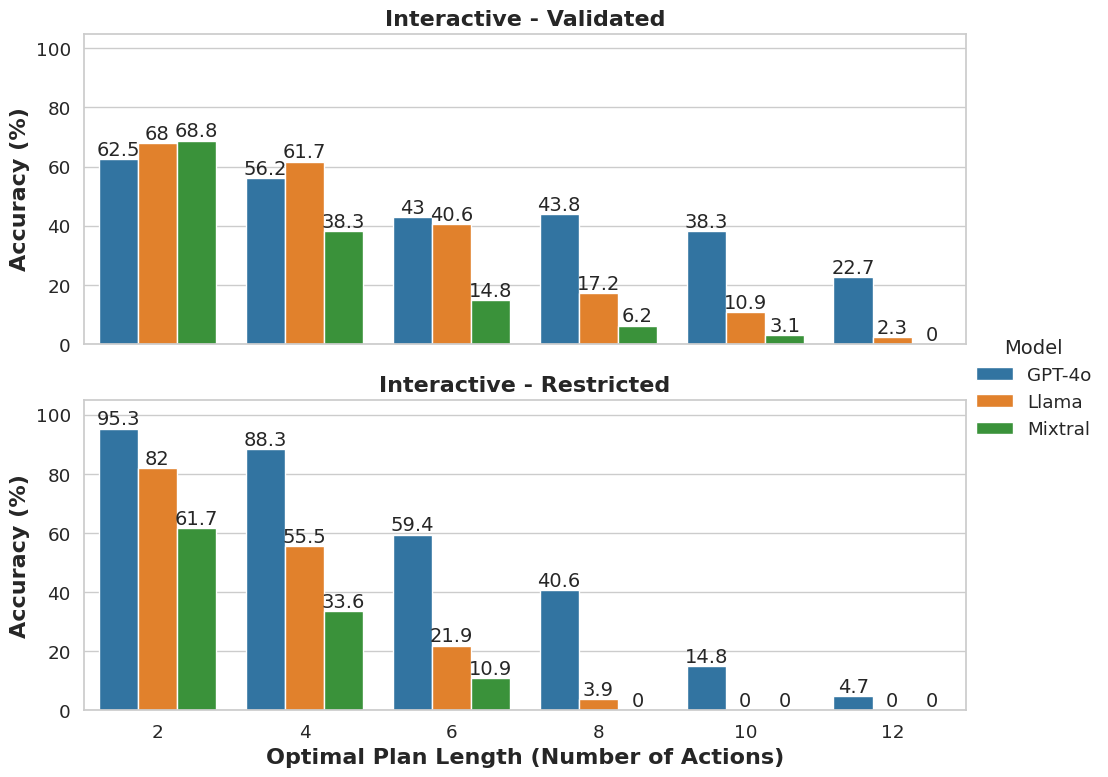

In [63]:
sn.set_style("whitegrid")
sn.set_palette("tab10")
acc_methods_models = experiment_df_methods.groupby(["method", "Model", "ground_truth_n_actions"], as_index=False)["correct_response"].agg("mean")

acc_methods_models["correct_response"] = (acc_methods_models["correct_response"] * 100).round(1)

ax = sn.catplot(acc_methods_models, col="method", y="correct_response", x="ground_truth_n_actions", kind="bar", col_wrap=1, hue="Model", height=4, aspect=2.5)


#ax.figure.suptitle("Accuracy for Optimal Plan Length", fontweight='bold');
#ax.figure.subplots_adjust(top=0.9)

ax.axes[0].set_title("Interactive - Validated", fontweight='bold', fontsize=16);
ax.axes[1].set_title("Interactive - Restricted", fontweight='bold', fontsize=16);

ax.axes[0].set_ylabel("Accuracy (%)", fontweight='bold', fontsize=16);
ax.axes[1].set_ylabel("Accuracy (%)", fontweight='bold', fontsize=16);

ax.axes[0].bar_label(ax.axes[0].containers[0], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[1], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[2], fontsize=14)

ax.axes[1].bar_label(ax.axes[1].containers[0], fontsize=14)
ax.axes[1].bar_label(ax.axes[1].containers[1], fontsize=14)
ax.axes[1].bar_label(ax.axes[1].containers[2], fontsize=14)

ax.axes[0].spines[['right', 'top']].set_visible(True)
ax.axes[1].spines[['right', 'top']].set_visible(True)

ax.axes[1].set_ylim(0, 105)

ax.legend.set_title("Model", prop={"size": 14})
ax.axes[1].set_xlabel("Optimal Plan Length (Number of Actions)", fontweight='bold', fontsize=16);
ax.figure.savefig("images/paper/acc_optimal.pdf", bbox_inches='tight')

In [45]:
experiment_df_methods_fail = experiment_df_methods[experiment_df_methods["correct_response"] == False]

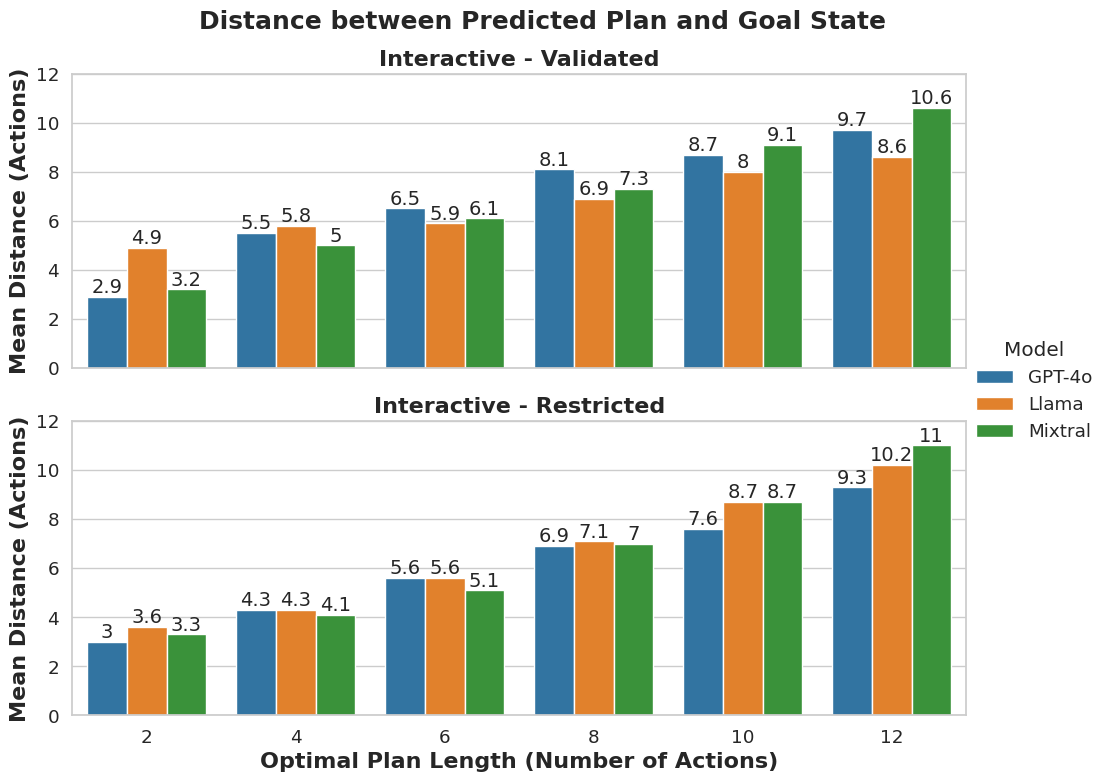

In [64]:
distance_df = experiment_df_methods_fail.groupby(["method", "Model", "ground_truth_n_actions"])[["distance_to_ground_truth", "distance_to_init"]].agg("mean").round(1)

ax = sn.catplot(distance_df, col="method", y="distance_to_ground_truth", x="ground_truth_n_actions", kind="bar", col_wrap=1, hue="Model", height=4, aspect=2.5)

ax.figure.suptitle("Distance between Predicted Plan and Goal State", fontweight='bold', fontsize=18);
ax.figure.subplots_adjust(top=0.9)

ax.axes[0].set_title("Interactive - Validated", fontweight='bold', fontsize=16);
ax.axes[1].set_title("Interactive - Restricted", fontweight='bold', fontsize=16);

ax.axes[0].set_ylabel("Mean Distance (Actions)", fontweight='bold', fontsize=16);
ax.axes[1].set_ylabel("Mean Distance (Actions)", fontweight='bold', fontsize=16);

ax.axes[0].bar_label(ax.axes[0].containers[0], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[1], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[2], fontsize=14)

ax.axes[1].bar_label(ax.axes[1].containers[0], fontsize=14)
ax.axes[1].bar_label(ax.axes[1].containers[1], fontsize=14)
ax.axes[1].bar_label(ax.axes[1].containers[2], fontsize=14)

ax.axes[0].spines[['right', 'top']].set_visible(True)
ax.axes[1].spines[['right', 'top']].set_visible(True)

ax.axes[1].set_ylim(0, 12)

ax.axes[1].set_xlabel("Optimal Plan Length (Number of Actions)", fontweight='bold', fontsize=16);

ax.figure.savefig("images/paper/distance_goal.pdf", bbox_inches='tight')

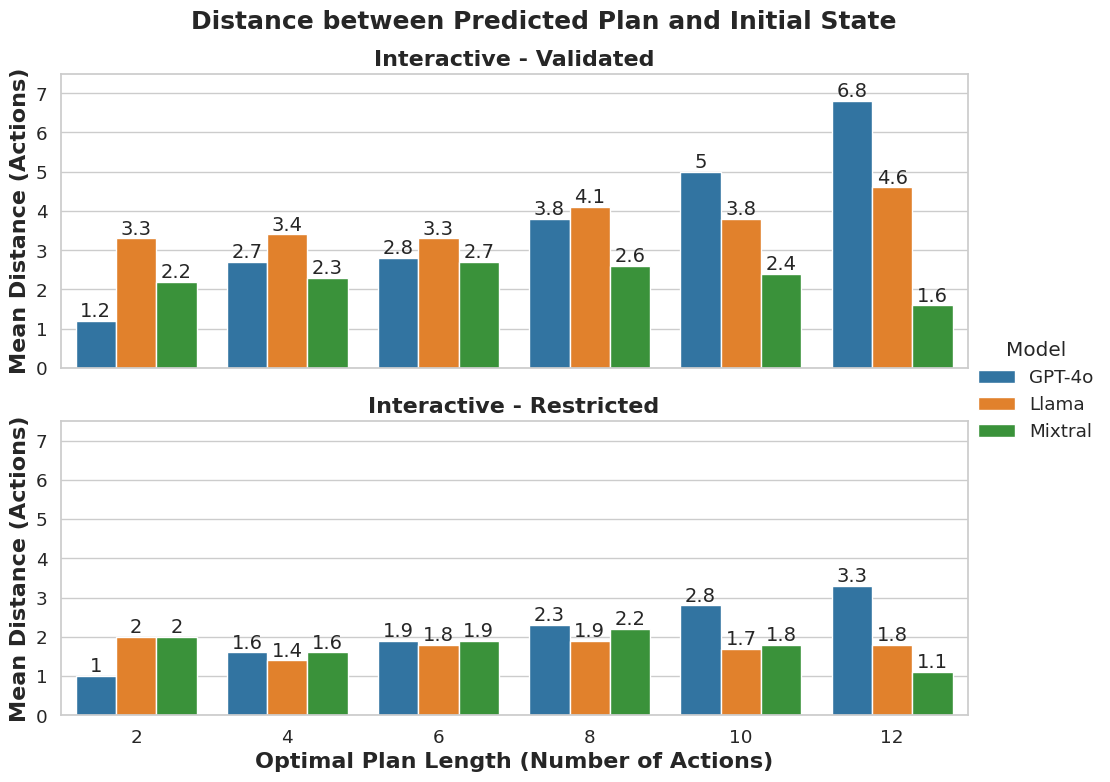

In [65]:
ax = sn.catplot(distance_df, col="method", y="distance_to_init", x="ground_truth_n_actions", kind="bar", col_wrap=1, hue="Model", height=4, aspect=2.5)

ax.figure.suptitle("Distance between Predicted Plan and Initial State", fontweight='bold', fontsize=18);
ax.figure.subplots_adjust(top=0.9)

ax.axes[0].set_title("Interactive - Validated", fontweight='bold', fontsize=16);
ax.axes[1].set_title("Interactive - Restricted", fontweight='bold', fontsize=16);

ax.axes[0].set_ylabel("Mean Distance (Actions)", fontweight='bold', fontsize=16);
ax.axes[1].set_ylabel("Mean Distance (Actions)", fontweight='bold', fontsize=16);

ax.axes[0].bar_label(ax.axes[0].containers[0], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[1], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[2], fontsize=14)

ax.axes[1].bar_label(ax.axes[1].containers[0], fontsize=14)
ax.axes[1].bar_label(ax.axes[1].containers[1], fontsize=14)
ax.axes[1].bar_label(ax.axes[1].containers[2], fontsize=14)

ax.axes[0].spines[['right', 'top']].set_visible(True)
ax.axes[1].spines[['right', 'top']].set_visible(True)

ax.axes[0].set_ylim(0, 7.5)

ax.axes[1].set_xlabel("Optimal Plan Length (Number of Actions)", fontweight='bold', fontsize=16);

ax.figure.savefig("images/paper/distance_init.pdf", bbox_inches='tight')

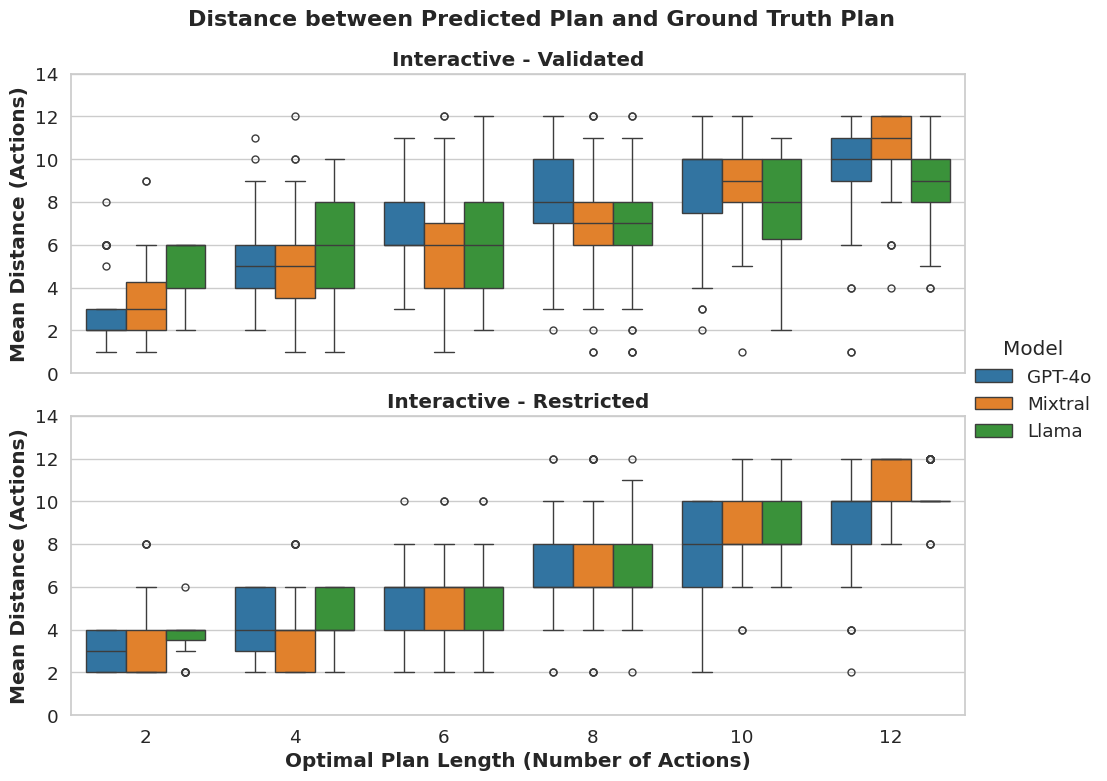

In [51]:
distance_df = experiment_df_methods_fail.groupby(["method", "Model", "ground_truth_n_actions"])[["distance_to_ground_truth", "distance_to_init"]].agg("mean").round(1)

ax = sn.catplot(experiment_df_methods_fail, col="method", y="distance_to_ground_truth", x="ground_truth_n_actions", kind="box", col_wrap=1, hue="Model", height=4, aspect=2.5)

ax.figure.suptitle("Distance between Predicted Plan and Ground Truth Plan", fontweight='bold', fontsize=18);
ax.figure.subplots_adjust(top=0.9)

ax.axes[0].set_ylim(0, 14)

ax.axes[0].set_title("Interactive - Validated", fontweight='bold');
ax.axes[1].set_title("Interactive - Restricted", fontweight='bold');

ax.axes[0].set_ylabel("Mean Distance (Actions)", fontweight='bold');
ax.axes[1].set_ylabel("Mean Distance (Actions)", fontweight='bold');

ax.axes[0].spines[['right', 'top']].set_visible(True)
ax.axes[1].spines[['right', 'top']].set_visible(True)

ax.axes[1].set_xlabel("Optimal Plan Length (Number of Actions)", fontweight='bold');

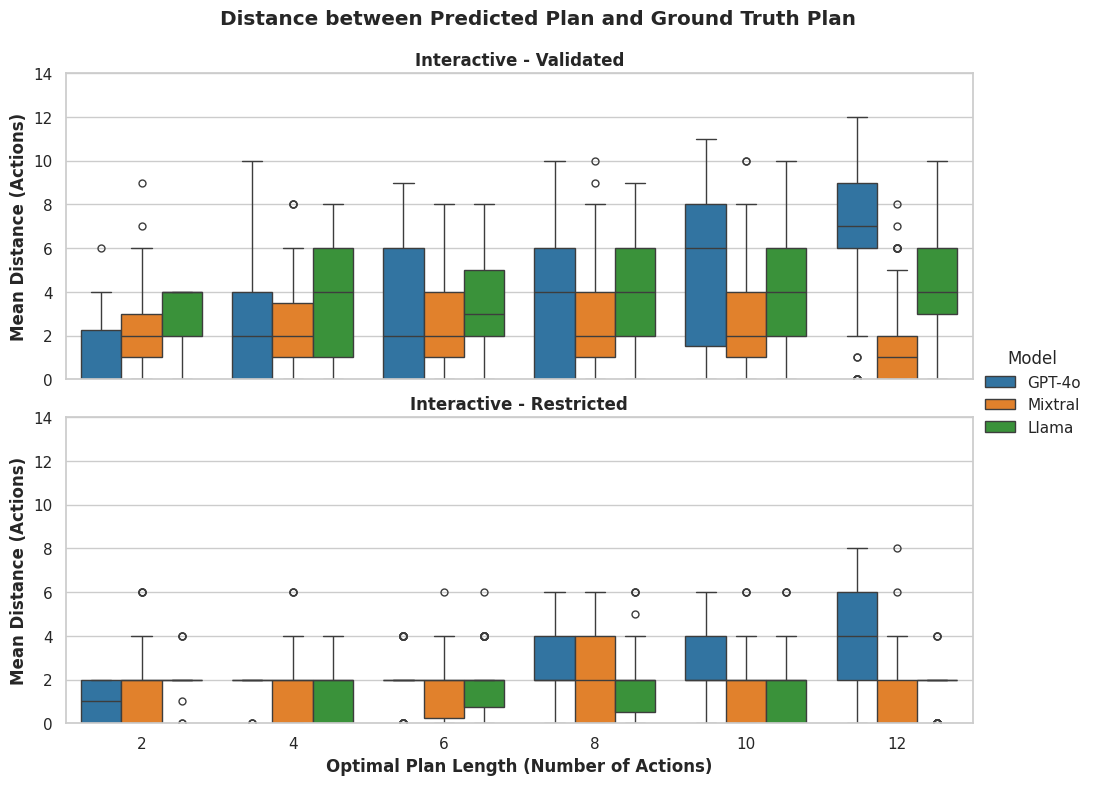

In [27]:
ax = sn.catplot(experiment_df_methods_fail, col="method", y="distance_to_init", x="ground_truth_n_actions", kind="box", col_wrap=1, hue="Model", height=4, aspect=2.5)

ax.figure.suptitle("Distance between Predicted Plan and Ground Truth Plan", fontweight='bold');
ax.figure.subplots_adjust(top=0.9)

ax.axes[0].set_ylim(0, 14)

ax.axes[0].set_title("Interactive - Validated", fontweight='bold');
ax.axes[1].set_title("Interactive - Restricted", fontweight='bold');

ax.axes[0].set_ylabel("Mean Distance (Actions)", fontweight='bold');
ax.axes[1].set_ylabel("Mean Distance (Actions)", fontweight='bold');

ax.axes[0].spines[['right', 'top']].set_visible(True)
ax.axes[1].spines[['right', 'top']].set_visible(True)

ax.axes[1].set_xlabel("Optimal Plan Length (Number of Actions)", fontweight='bold');

In [49]:
experiment_df_methods_success = experiment_df_methods[experiment_df_methods["correct_response"] == True]

In [50]:
experiment_df_methods_success["relative_iterations"] = experiment_df_methods_success["n_actions"] / experiment_df_methods_success["ground_truth_n_actions"]

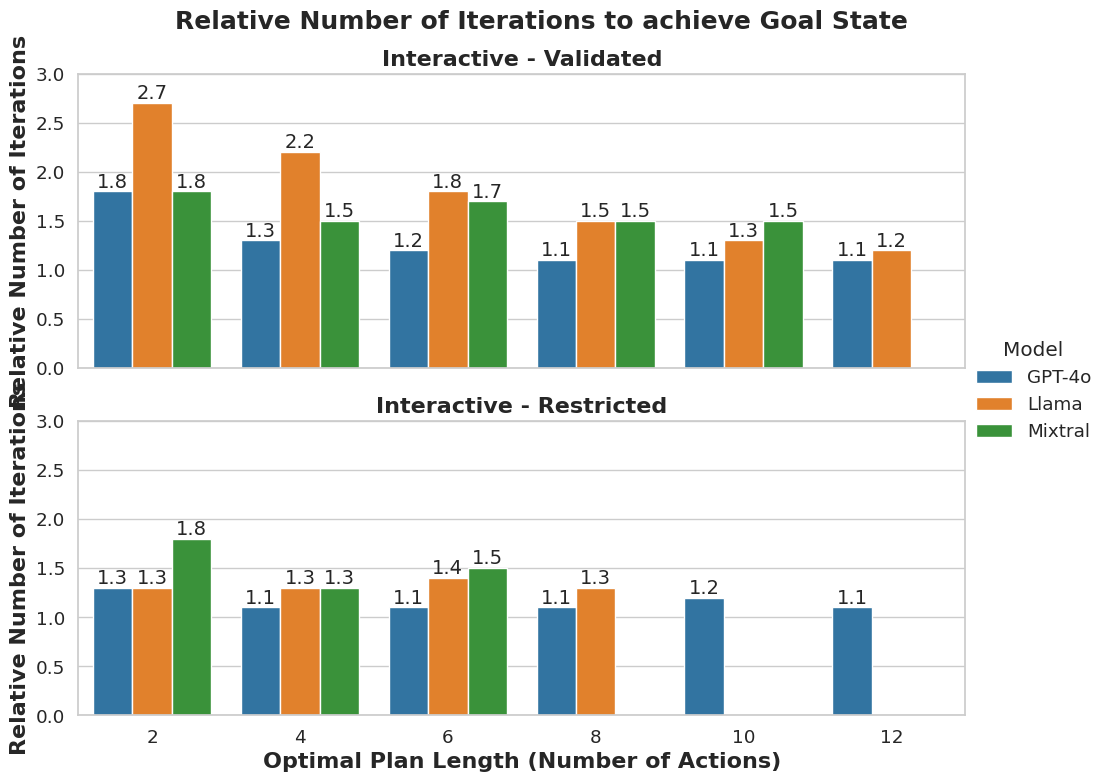

In [66]:
iterations_df = experiment_df_methods_success.groupby(["method", "Model", "ground_truth_n_actions"])[["relative_iterations"]].agg("mean").round(1)

ax = sn.catplot(iterations_df, col="method", y="relative_iterations", x="ground_truth_n_actions", kind="bar", col_wrap=1, hue="Model", height=4, aspect=2.5)

ax.figure.suptitle("Relative Number of Iterations to achieve Goal State", fontweight='bold', fontsize=18);
ax.figure.subplots_adjust(top=0.9)

ax.axes[0].set_title("Interactive - Validated", fontweight='bold', fontsize=16);
ax.axes[1].set_title("Interactive - Restricted", fontweight='bold', fontsize=16);

ax.axes[0].set_ylabel("Relative Number of Iterations", fontweight='bold', fontsize=16);
ax.axes[1].set_ylabel("Relative Number of Iterations", fontweight='bold', fontsize=16);

ax.axes[0].bar_label(ax.axes[0].containers[0], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[1], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[2], fontsize=14)

ax.axes[1].bar_label(ax.axes[1].containers[0], fontsize=14)
ax.axes[1].bar_label(ax.axes[1].containers[1], fontsize=14)
ax.axes[1].bar_label(ax.axes[1].containers[2], fontsize=14)

ax.axes[0].spines[['right', 'top']].set_visible(True)
ax.axes[1].spines[['right', 'top']].set_visible(True)

ax.axes[1].set_ylim(0, 3)

ax.axes[1].set_xlabel("Optimal Plan Length (Number of Actions)", fontweight='bold', fontsize=16);

ax.figure.savefig("images/paper/number_iterations.pdf", bbox_inches='tight')

In [53]:
repeated_states_llama = pd.read_csv("metrics_results/llama_paper_repeated_states.csv")
repeated_states_gpto = pd.read_csv("metrics_results/gpto_paper_repeated_states.csv")
repeated_states_mixtral = pd.read_csv("metrics_results/mixtral_paper_repeated_states.csv")

In [54]:
repeated_states_gpto["Model"] = "GPT-4o"
repeated_states_llama["Model"] = "Llama"
repeated_states_mixtral["Model"] = "Mixtral"

repeated_states = pd.concat([repeated_states_gpto, repeated_states_llama, repeated_states_mixtral])

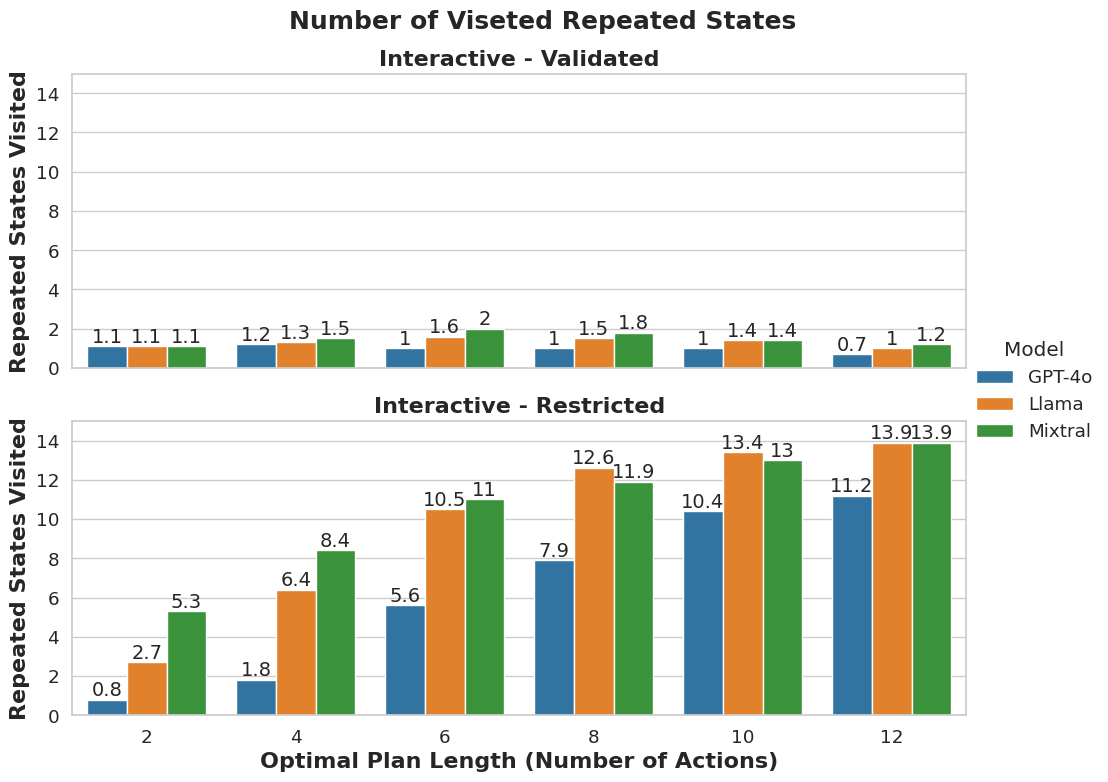

In [67]:
repeated_states_df = repeated_states.groupby(["method", "Model", "ground_truth_n_actions"])[["repeated_states"]].agg("mean").round(1)

ax = sn.catplot(repeated_states_df, col="method", y="repeated_states", x="ground_truth_n_actions", kind="bar", col_wrap=1, hue="Model", height=4, aspect=2.5)

ax.figure.suptitle("Number of Viseted Repeated States", fontweight='bold', fontsize=18);
ax.figure.subplots_adjust(top=0.9)

ax.axes[0].set_title("Interactive - Validated", fontweight='bold', fontsize=16);
ax.axes[1].set_title("Interactive - Restricted", fontweight='bold', fontsize=16);

ax.axes[0].set_ylabel("Repeated States Visited", fontweight='bold', fontsize=16);
ax.axes[1].set_ylabel("Repeated States Visited", fontweight='bold', fontsize=16);

ax.axes[0].bar_label(ax.axes[0].containers[0], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[1], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[2], fontsize=14)

ax.axes[1].bar_label(ax.axes[1].containers[0], fontsize=14)
ax.axes[1].bar_label(ax.axes[1].containers[1], fontsize=14)
ax.axes[1].bar_label(ax.axes[1].containers[2], fontsize=14)

ax.axes[0].spines[['right', 'top']].set_visible(True)
ax.axes[1].spines[['right', 'top']].set_visible(True)

ax.axes[1].set_ylim(0, 15)

ax.axes[1].set_xlabel("Optimal Plan Length (Number of Actions)", fontweight='bold', fontsize=16);

ax.figure.savefig("images/paper/repeated_states.pdf", bbox_inches='tight')

In [17]:
concept_proof = experiment_df[(experiment_df["Model"] == "Mixtral") & (experiment_df["iter_mode"] == 1) & (experiment_df["method"].isin([0, 1, 3]))]

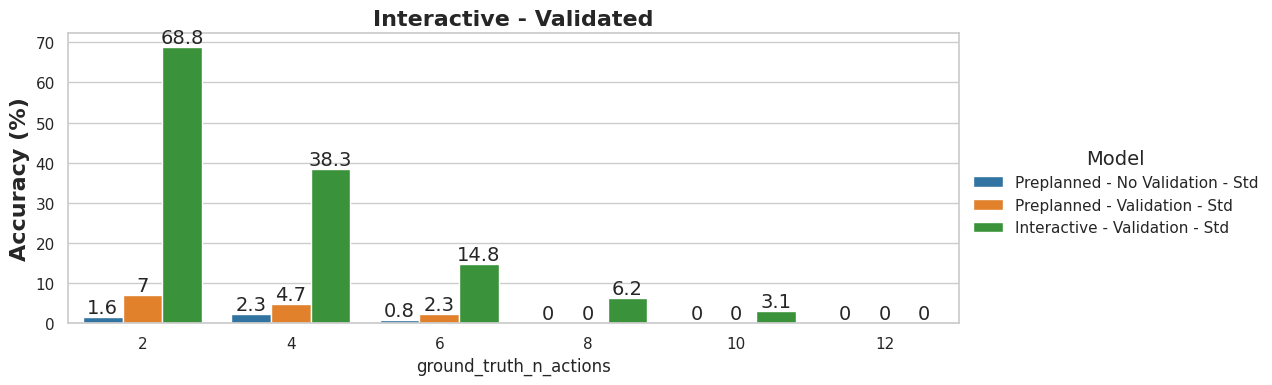

In [43]:
sn.set_style("whitegrid")
sn.set_palette("tab10")
acc_methods_models = concept_proof.groupby(["method", "Model", "ground_truth_n_actions"], as_index=False)["correct_response"].agg("mean")

acc_methods_models["correct_response"] = (acc_methods_models["correct_response"] * 100).round(1)
acc_methods_models["method_name"] = acc_methods_models["method"].map({0: "Preplanned - No Validation - Std", 1: "Preplanned - Validation - Std", 3: "Interactive - Validation - Std"})

ax = sn.catplot(acc_methods_models, col="Model", y="correct_response", x="ground_truth_n_actions", kind="bar", col_wrap=1, hue="method_name", height=4, aspect=2.5)


#ax.figure.suptitle("Accuracy for Optimal Plan Length", fontweight='bold');
#ax.figure.subplots_adjust(top=0.9)

ax.axes[0].set_title("Interactive - Validated", fontweight='bold', fontsize=16);

ax.axes[0].set_ylabel("Accuracy (%)", fontweight='bold', fontsize=16);

ax.axes[0].bar_label(ax.axes[0].containers[0], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[1], fontsize=14)
ax.axes[0].bar_label(ax.axes[0].containers[2], fontsize=14)


ax.axes[0].spines[['right', 'top']].set_visible(True)


ax.legend.set_title("Model", prop={"size": 14})
ax.figure.savefig("images/tcc/acc_concept_proof.pdf", bbox_inches='tight')

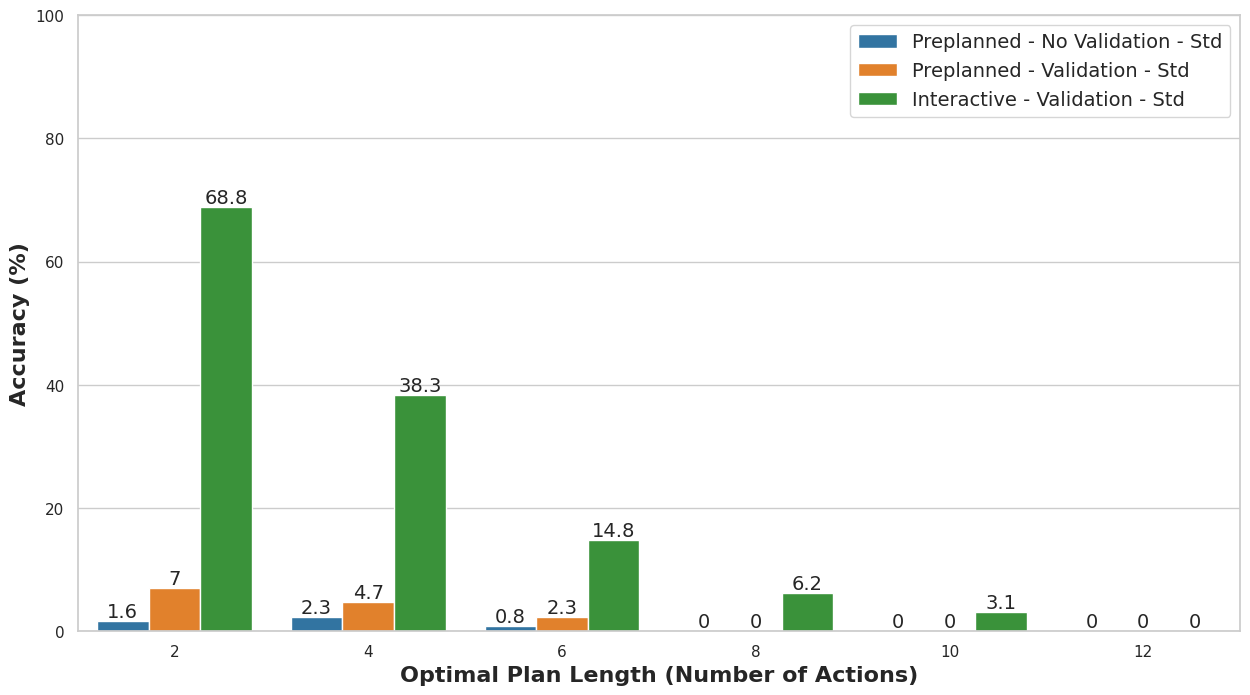

In [44]:
plt.figure(figsize=(15, 8))
ax = sn.barplot(acc_methods_models, y="correct_response", x="ground_truth_n_actions", hue="method_name")
ax.set_title("Interactive - Validated", fontweight='bold', fontsize=16);
ax.bar_label(ax.containers[0], fontsize=14);
ax.bar_label(ax.containers[1], fontsize=14);
ax.bar_label(ax.containers[2], fontsize=14);
ax.set_title("", fontweight='bold', fontsize=16);
ax.set_xlabel("Optimal Plan Length (Number of Actions)", fontweight='bold', fontsize=16);
ax.set_ylabel("Accuracy (%)", fontweight='bold', fontsize=16);
ax.set_ylim(0, 100)
plt.legend(prop={'size': 14});
ax.figure.savefig("images/tcc/acc_concept_proof.pdf", bbox_inches='tight')

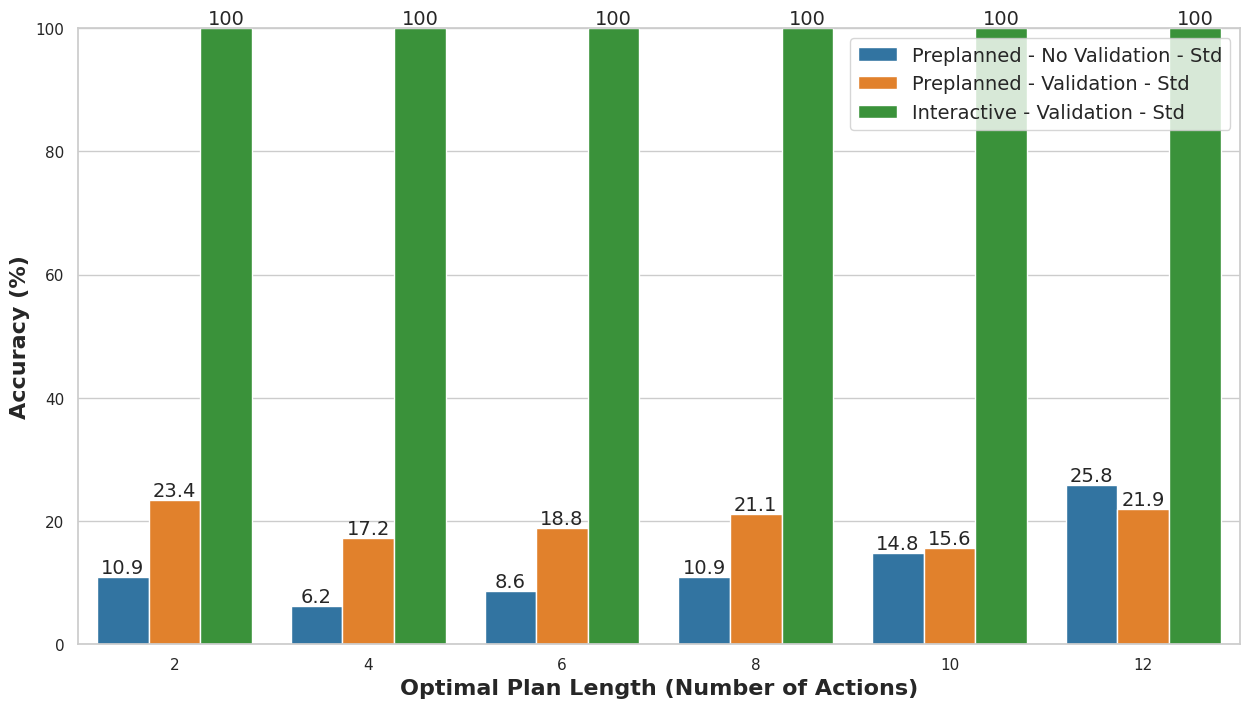

In [50]:
plt.figure(figsize=(15, 8))
acc_methods_models = concept_proof.groupby(["method", "Model", "ground_truth_n_actions"], as_index=False)[["correct_response", "all_possible_actions"]].agg("mean")
acc_methods_models["correct_response"] = (acc_methods_models["correct_response"] * 100).round(1)
acc_methods_models["all_possible_actions"] = (acc_methods_models["all_possible_actions"] * 100).round(1)
acc_methods_models["method_name"] = acc_methods_models["method"].map({0: "Preplanned - No Validation - Std", 1: "Preplanned - Validation - Std", 3: "Interactive - Validation - Std"})
ax = sn.barplot(acc_methods_models, y="all_possible_actions", x="ground_truth_n_actions", hue="method_name")
ax.set_title("Interactive - Validated", fontweight='bold', fontsize=16);
ax.bar_label(ax.containers[0], fontsize=14);
ax.bar_label(ax.containers[1], fontsize=14);
ax.bar_label(ax.containers[2], fontsize=14);
ax.set_title("", fontweight='bold', fontsize=16);
ax.set_xlabel("Optimal Plan Length (Number of Actions)", fontweight='bold', fontsize=16);
ax.set_ylabel("Accuracy (%)", fontweight='bold', fontsize=16);
ax.set_ylim(0, 100)
plt.legend(prop={'size': 14});

In [47]:
concept_proof

,instance_id,ground_truth_plan,goal_achieved,content,actions_text,actions_possible,n_actions,ground_truth_n_actions,correct_response,n_run,...,all_possible_actions,method_name,iter_mode,n_iterations,distance_to_ground_truth,distance_to_init,Model,n_possible_actions,n_iterations_iterative,n_token
768,1657,(unstack b a)\n(put-down b)\n(unstack a c)\n(s...,False,human: I am playing with a set of blocks where...,pick up the blue block.unstack the blue block ...,0.1.1.0.0.0.0.0,8,10,False,1,...,False,Full Plan Prompt,1,1,10,0,Mixtral,2,8,578.666667
769,1819,(unstack d c)\n(put-down d)\n(unstack c a)\n(p...,False,human: I am playing with a set of blocks where...,pick up the yellow block.unstack the orange bl...,0.0.0.0.0.0,6,12,False,1,...,False,Full Plan Prompt,1,1,12,0,Mixtral,0,6,570.666667
770,831,(unstack b d)\n(stack b a)\n,False,human: I am playing with a set of blocks where...,pick up the blue block,0,1,2,False,1,...,False,Full Plan Prompt,1,1,2,0,Mixtral,0,1,492.000000
771,1280,(unstack d a)\n(stack d c)\n(unstack a b)\n(pu...,False,human: I am playing with a set of blocks where...,pick up the red block.unstack the yellow block...,0.1.1.0.1.0,6,10,False,1,...,False,Full Plan Prompt,1,1,10,0,Mixtral,3,6,573.333333
772,1451,(pick-up d)\n(stack d b)\n,False,human: I am playing with a set of blocks where...,pick up the yellow block.put down the yellow b...,1.1.1.0,4,2,False,1,...,False,Full Plan Prompt,1,1,2,0,Mixtral,3,4,529.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,956,(unstack c d)\n(put-down c)\n(unstack d b)\n(p...,False,human: I am playing with a set of blocks where...,unstack the blue block from on top of the red ...,0.1.1.0.0.0.0.0.0.0.1.0.1.0.0.0,16,6,False,1,...,True,Validation Iterative Actions,1,16,4,2,Mixtral,4,16,15401.333333
3836,876,(unstack a b)\n(put-down a)\n(unstack b d)\n(p...,False,human: I am playing with a set of blocks where...,unstack the blue block from on top of the yell...,0.0.0.0.0.0.0.0.0.0.0.0.0.0.0.0,16,12,False,1,...,True,Validation Iterative Actions,1,22,12,0,Mixtral,0,16,16460.000000
3837,1093,(unstack b d)\n(put-down b)\n(unstack d c)\n(p...,False,human: I am playing with a set of blocks where...,unstack the blue block from on top of the yell...,1.1.0.0.0.0.0.0.0.0.1.1.0.0.0.0,16,8,False,1,...,True,Validation Iterative Actions,1,18,8,0,Mixtral,4,16,16046.666667
3838,1830,(pick-up a)\n(stack a c)\n,False,human: I am playing with a set of blocks where...,pick up the red block.put down the red block.u...,1.1.0.0.0.1.1.0.1.1.0.1.1.0.1.1,16,2,False,1,...,True,Validation Iterative Actions,1,18,2,2,Mixtral,10,16,15537.333333
